In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-hold-power-consumption/household_power_consumption.txt


In [2]:
#first, we read the data and preprocess it in a csv
data_path = "../input/house-hold-power-consumption/household_power_consumption.txt"

#read data
data = pd.read_csv(data_path, delimiter=";", parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan', '?'], index_col='datetime')

In [4]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Check for missing data**

In [5]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
data.shape

(2075259, 7)

**Handle missing data**

In [7]:
# lets see the type of timeserries data we have before proceeding to handle the missing data
test_data = data.copy()
test_data.dropna(inplace=True)
test_data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
test_data = test_data.assign(Global_active_power=test_data.Global_active_power.fillna(test_data.Global_active_power.mean()))
test_data = test_data.assign(Global_reactive_power=test_data.Global_reactive_power.fillna(test_data.Global_reactive_power.mean()))
test_data = test_data.assign(Voltage = test_data.Voltage.fillna(test_data.Voltage.mean()))
test_data = test_data.assign(Global_intensity = test_data.Global_intensity.fillna(test_data.Global_intensity.mean()))
test_data = test_data.assign(Sub_metering_1 = test_data.Sub_metering_1.fillna(test_data.Sub_metering_1.mean()))
test_data = test_data.assign(Sub_metering_2 = test_data.Sub_metering_2.fillna(test_data.Sub_metering_2.mean()))
test_data = test_data.assign(Sub_metering_3 = test_data.Sub_metering_3.fillna(test_data.Sub_metering_3.mean()))

In [9]:
test_data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# **A little exploration**

Text(0, 0.5, 'Global_active_power')

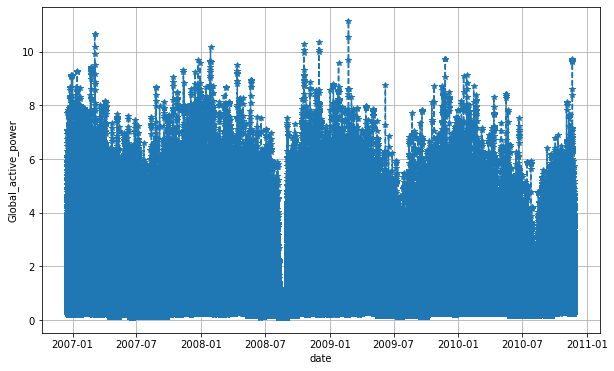

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data.Global_active_power, "--", marker="*")
plt.grid()
plt.xlabel('date')
plt.ylabel('Global_active_power')

The plot looks messy so we resample over a day and replot

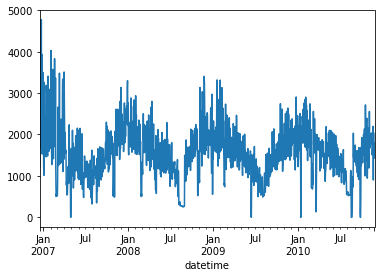

In [11]:
test_data.Global_active_power.resample('D').sum().plot()

#we also do some smoothening to better understand the progress in our dataset

**This presents a clearer view of the trend in our data on global active power**
**next, we do the same for every other feature in our series dataframe**

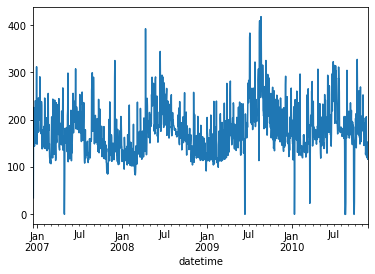

In [29]:
test_data.Global_reactive_power.resample('D').sum().plot()

Text(0, 0.5, 'Passengers')

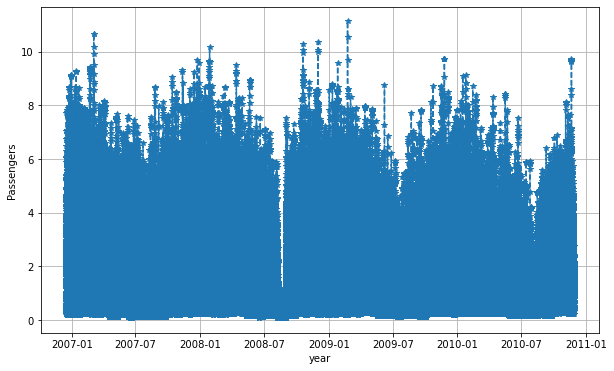

In [14]:
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data.Global_active_power, "--", marker="*")
plt.grid()
plt.xlabel('year')
plt.ylabel('Passengers')

In [44]:
daily_data = test_data.resample('D').sum()


In [46]:
daily_data = daily_data.reset_index()
daily_data.head()

,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [47]:
daily_data.drop(columns=["Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"], inplace=True)

In [50]:
daily_data.drop(columns=["index"], inplace=True)

In [51]:
daily_data

,datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164


In [100]:
daily_data["datetime"] = pd.to_datetime(daily_data["datetime"])
daily_data.rename(columns={"datetime": "ds", "Global_active_power":"y"}, inplace=True)
daily_data.head()

KeyError: 'datetime'

In [59]:
#divide into train and test set

X_train = daily_data.iloc[:365, :]
X_test = daily_data.iloc[-365:, :]

In [60]:
X_train.shape

(365, 2)

In [61]:
X_test.shape

(365, 2)

In [63]:
daily_data.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [64]:
daily_data.tail()

,ds,y
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164
1441,2010-11-26,1488.104


In [67]:
X_test.tail()

,ds,y
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164
1441,2010-11-26,1488.104


In [115]:
from fbprophet import Prophet

model2 = Prophet()

In [116]:
model2.fit(X_train)

#predict for next 10 months
future = model2.make_future_dataframe(periods=12, freq="D")
forecast = model2.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,2444.097172,1928.528237,3415.432070,2444.097172,2444.097172,196.093127,196.093127,196.093127,196.093127,196.093127,196.093127,0.0,0.0,0.0,2640.190299
1,2006-12-17,2436.751303,2115.539876,3471.234264,2436.751303,2436.751303,352.842002,352.842002,352.842002,352.842002,352.842002,352.842002,0.0,0.0,0.0,2789.593305
2,2006-12-18,2429.405434,1577.816889,2959.027243,2429.405434,2429.405434,-132.627792,-132.627792,-132.627792,-132.627792,-132.627792,-132.627792,0.0,0.0,0.0,2296.777642
3,2006-12-19,2422.059565,1538.024533,3015.743875,2422.059565,2422.059565,-111.088187,-111.088187,-111.088187,-111.088187,-111.088187,-111.088187,0.0,0.0,0.0,2310.971379
4,2006-12-20,2414.713697,1591.565194,3104.627160,2414.713697,2414.713697,-39.187776,-39.187776,-39.187776,-39.187776,-39.187776,-39.187776,0.0,0.0,0.0,2375.525920


In [96]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
370,2007-12-21,2093.351734,1270.799402,2738.793931,2092.598055,2094.077362,-105.277790,-105.277790,-105.277790,-105.277790,-105.277790,-105.277790,0.0,0.0,0.0,1988.073944
371,2007-12-22,2100.773717,1549.048913,2954.671572,2099.773247,2101.897487,196.093127,196.093127,196.093127,196.093127,196.093127,196.093127,0.0,0.0,0.0,2296.866845
372,2007-12-23,2108.195700,1679.072105,3184.036208,2106.704157,2109.746022,352.842002,352.842002,352.842002,352.842002,352.842002,352.842002,0.0,0.0,0.0,2461.037702
373,2007-12-24,2115.617684,1200.259883,2708.253635,2113.642267,2117.568305,-132.627792,-132.627792,-132.627792,-132.627792,-132.627792,-132.627792,0.0,0.0,0.0,1982.989891
374,2007-12-25,2123.039667,1302.889623,2753.639788,2120.496802,2125.408822,-111.088187,-111.088187,-111.088187,-111.088187,-111.088187,-111.088187,0.0,0.0,0.0,2011.951480


In [97]:
365 * 3


pred = pd.DataFrame(forecast.ds, forecast.yhat)

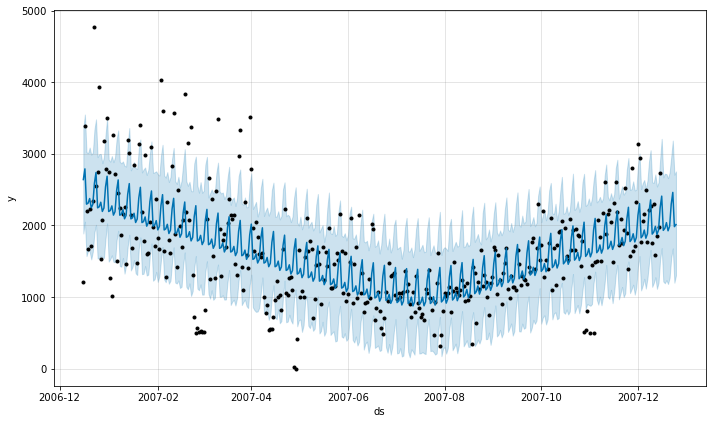

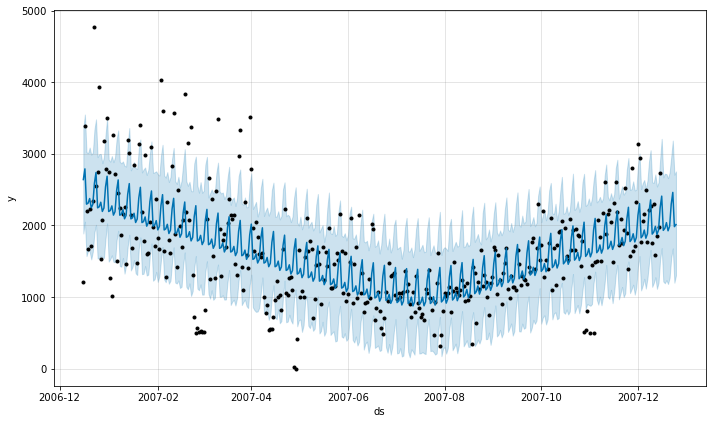

In [98]:
model2.plot(forecast)

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [107]:
new_data = test_data

In [108]:
new_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [109]:
new_data.reset_index(inplace=True)

In [110]:
new_data.head()

,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [112]:
new_data["datetime"] = pd.to_datetime(new_data["datetime"])
new_data.rename(columns={"datetime": "ds", "Global_reactive_power":"add1","Voltage": "add2", "Global_intensity":"add3", "Sub_metering_1":"add4", "Sub_metering_2":"add5", "Sub_metering_3":"add6","Global_active_power":"y"}, inplace=True)

In [113]:
new_model =Prophet()

In [118]:
#divide into train and test set

X_train_new = new_data.iloc[:365, :]
X_test_new = new_data.iloc[-365:, :]

In [121]:
new_model.fit(X_train_new)

#predict for next 10 months
future = new_model.make_future_dataframe(periods=10, freq="D")
forecast = new_model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16 17:24:00,4.243204,3.302342,5.195514,4.243204,4.243204,0.0,0.0,0.0,0.0,0.0,0.0,4.243204
1,2006-12-16 17:25:00,4.236046,3.281388,5.195441,4.236046,4.236046,0.0,0.0,0.0,0.0,0.0,0.0,4.236046
2,2006-12-16 17:26:00,4.228888,3.278504,5.276490,4.228888,4.228888,0.0,0.0,0.0,0.0,0.0,0.0,4.228888
3,2006-12-16 17:27:00,4.221729,3.322080,5.132370,4.221729,4.221729,0.0,0.0,0.0,0.0,0.0,0.0,4.221729
4,2006-12-16 17:28:00,4.214571,3.319261,5.148737,4.214571,4.214571,0.0,0.0,0.0,0.0,0.0,0.0,4.214571


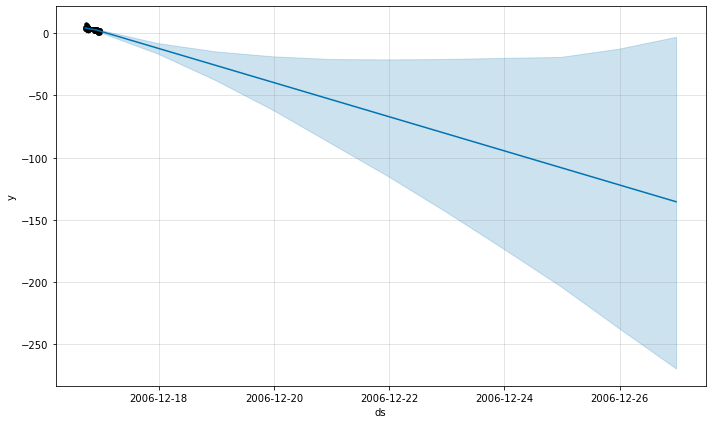

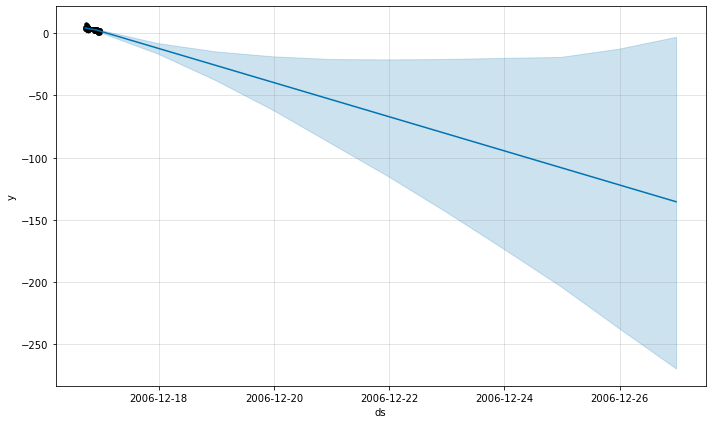

In [122]:
new_model.plot(forecast)